In [537]:
options(warn = -1)
options(scipen=100)

In [538]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv", header=T)

In [539]:
head(election)
tail(election)
str(election)
class(election)
summary(election)
table(is.na(election))


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


'data.frame':	248 obs. of  7 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군구  : Factor w/ 226 levels "가평군","강남구",..: 177 178 150 99 29 62 179 100 5 60 ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


[1] "data.frame"

       광역시도      시군구       선거인수          투표수      
 경기도    :41   동구   :  6   Min.   :  8141   Min.   :  6653  
 서울특별시:25   중구   :  6   1st Qu.: 47672   1st Qu.: 39216  
 경상북도  :24   서구   :  5   Median :154354   Median :114654  
 경상남도  :22   남구   :  4   Mean   :176570   Mean   :136148  
 전라남도  :22   북구   :  4   3rd Qu.:265099   3rd Qu.:204189  
 강원도    :18   강서구 :  2   Max.   :703896   Max.   :542027  
 (Other)   :96   (Other):221                                    
     이재명           윤석열           심상정     
 Min.   :  1590   Min.   :  2052   Min.   :  109  
 1st Qu.: 17363   1st Qu.: 18223   1st Qu.:  709  
 Median : 48797   Median : 50341   Median : 2618  
 Mean   : 64479   Mean   : 65566   Mean   : 3216  
 3rd Qu.: 99831   3rd Qu.:101950   3rd Qu.: 5041  
 Max.   :285227   Max.   :275155   Max.   :13249  
                                                  


FALSE 
 1736 

In [540]:
library(dplyr)

In [541]:
# 광역시도별 투표율 파이차트 그리기

city <- aggregate(투표수 ~ 광역시도, election, sum)
city <- arrange(city, desc(투표수))
city.ratio <- round(city$투표수 / sum(city$투표수) * 100 , 2)
label <-  paste(city$광역시도, "\n", city.ratio, "%")



In [542]:
library(plotrix)

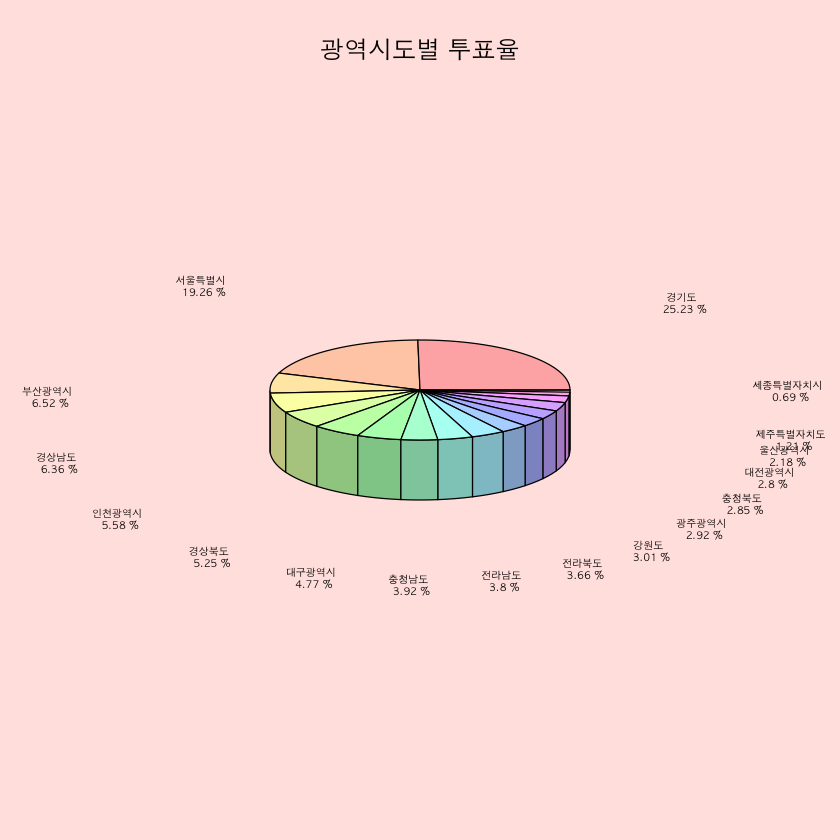

In [543]:
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(city$투표수,
        main = "광역시도별 투표율",
        labels = label,
        col = rainbow(length(label), s=0.3),
        labelcex = 0.5,
        radius = 0.5, # 반지름 사이즈 원 사이즈 조절

    )

In [544]:
# electionSum = 이재명 + 윤석열 + 심상정
election$electionSum <- apply(election[,5:7], 1, sum)
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
서울특별시,종로구,129968,100629,46130,49172,3115,98417
서울특별시,중구,111448,84998,38244,42906,2310,83460
서울특별시,용산구,199077,152068,60063,85047,4374,149484
서울특별시,성동구,252087,197240,84411,103880,5365,193656
서울특별시,광진구,303582,235471,109922,113733,7072,230727
서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [545]:
# electionRatio <- 투표수 대비 electionSum의 퍼센트 구해서 넣기
election$electionRatio <- election$electionSum / election$투표수 * 100
head(election)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [546]:
# 3명의 후보를 가장 많이 선택한 지역과 가장 적게 선택한 지역 구하기
# 1) 정렬 이용
arrange(election, desc(electionRatio))[c(1,nrow(election)),]
# 2) 부분집합 이용
subset(election, electionRatio == max(election$electionRatio) | electionRatio == min(election$electionRatio))


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
1,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751
248,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


In [547]:
# election_2022_job1.csv 로 저장하기
write.csv(election, "../Data/election_2022_job1.csv", row.names=F)

In [548]:
ifelse(윤석열.ratio > 3.0 , c(윤석열.ratio, "%"), '')

ERROR: Error in ifelse(윤석열.ratio > 3, c(윤석열.ratio, "%"), ""): 객체 '윤석열.ratio'를 찾을 수 없습니다


In [ ]:
aggregate(투표수 ~ 광역시도, election, sum)[,2]

[1] 1015458 8518854 2146882 1774284  985492 1611512  945308 2200224 6501831
[10]  231832  735461 1883504 1282168 1235212  409649 1324660  962333

In [ ]:
# 각 후보(윤석열, 이재명, 심상정)의 광역시도별 득표율을 3D Pie Chart 로 표현하기
# (단, 득표율이 3% 미만인 광역시도는 광역시도 명만 출력하고 퍼센트는 출력하지 않는다./ 퍼센트 단위는 소수 한자리)
이재명 <- aggregate(이재명 ~ 광역시도, election, sum)
이재명 <- arrange(이재명, desc(이재명))
이재명.ratio <- round(이재명$이재명 / sum(이재명$이재명) * 100 , 1)
label1 <-  paste(이재명$광역시도, "\n", ifelse(이재명.ratio > 3.0 , paste(이재명.ratio, "%"), ''))

윤석열 <- aggregate(윤석열 ~ 광역시도, election, sum)
윤석열 <- arrange(윤석열, desc(윤석열))
윤석열.ratio <- round(윤석열$윤석열 / sum(윤석열$윤석열) * 100 , 1)
label2 <-  paste(윤석열$광역시도, "\n", ifelse(윤석열.ratio > 3.0 , paste(윤석열.ratio, "%"), ''))

심상정 <- aggregate(심상정 ~ 광역시도, election, sum)
심상정 <- arrange(심상정, desc(심상정))
심상정.ratio <- round(심상정$심상정 / sum(심상정$심상정) * 100 , 1)
label3 <-  paste(심상정$광역시도, "\n", ifelse(심상정.ratio > 3.0 , paste(심상정.ratio, "%"), ''))


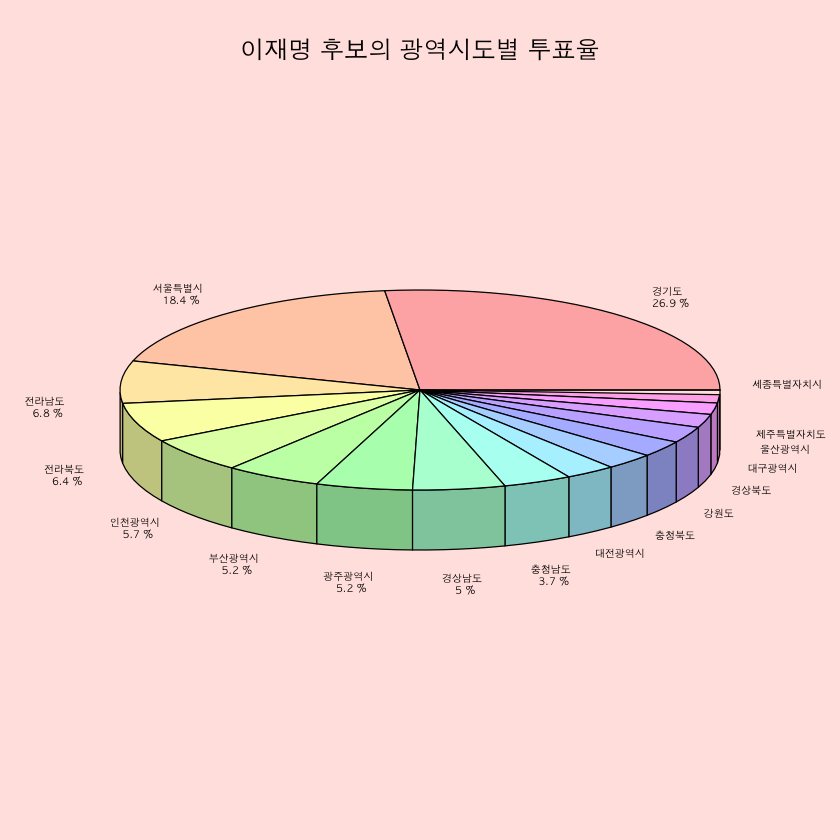

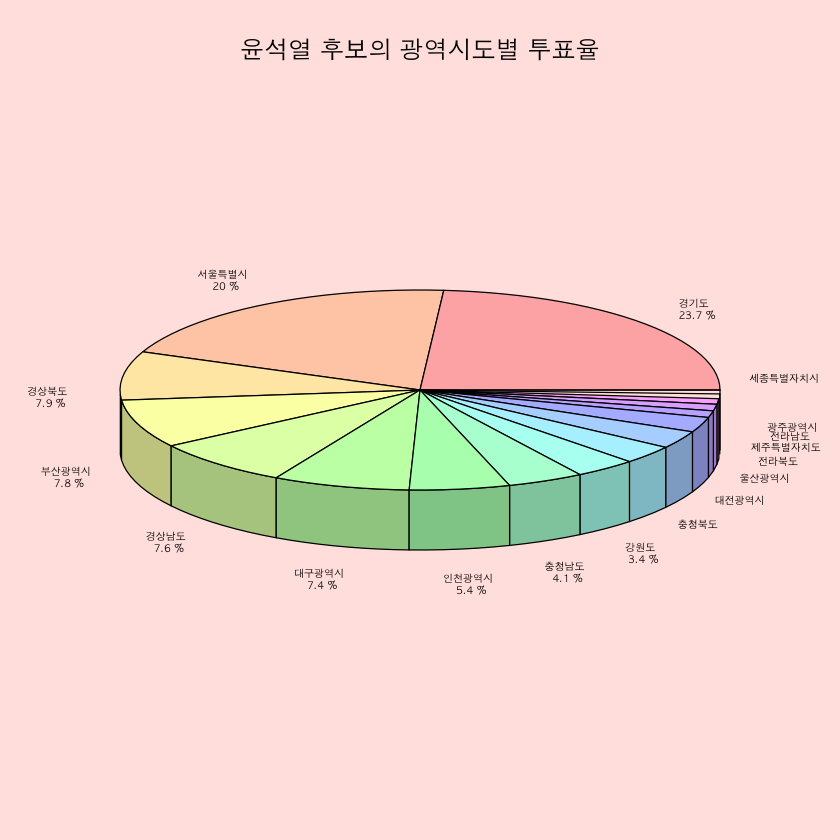

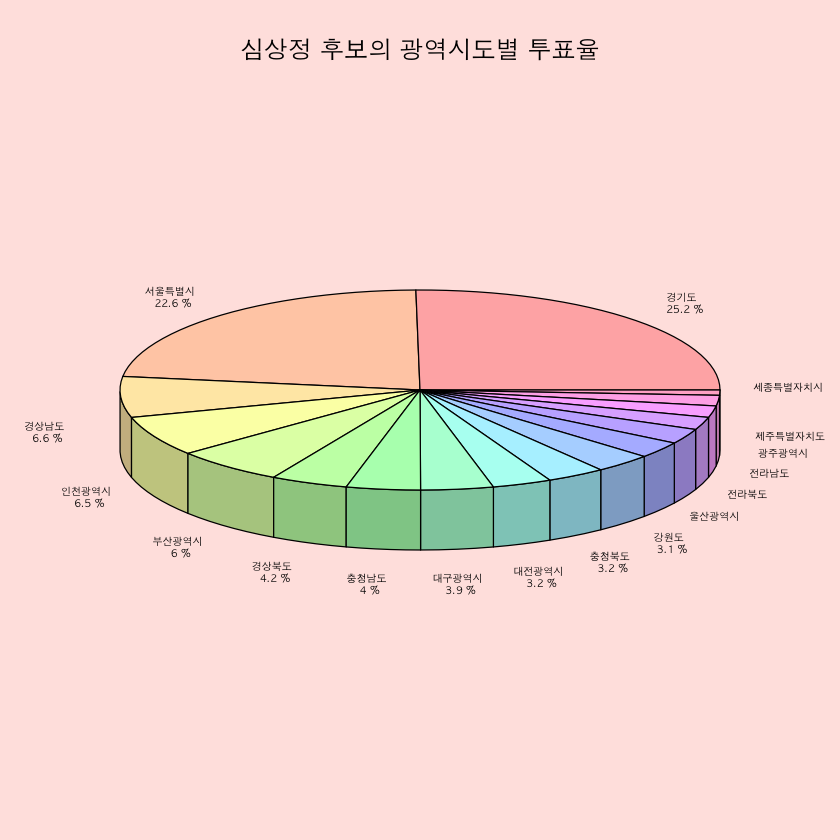

In [ ]:
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(이재명$이재명,
        main = "이재명 후보의 광역시도별 투표율",
        labels = label1,
        col = rainbow(length(label), s=0.3),
        labelcex = 0.5,
)
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(윤석열$윤석열,
        main = "윤석열 후보의 광역시도별 투표율",
        labels = label2,
        col = rainbow(length(label), s=0.3),
        labelcex = 0.5,
)
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(심상정$심상정,
        main = "심상정 후보의 광역시도별 투표율",
        labels = label3,
        col = rainbow(length(label), s=0.3),
        labelcex = 0.5,
    )

In [ ]:
# 수도권(경기도, 서울, 인천) 의 투표인구수의 퍼센트? 전체인구 대비 수도권투표수/전국투표수
sum(city$투표수[c(1:2,5)]) / sum(city$투표수) * 100

# 
round(sum(subset(election,광역시도 %in% c('경기도', '서울특별시', '인천광역시'))$투표수)/sum(election$투표수)*100,2)


[1] 50.06473

[1] 50.06

### 윤석열 후보의 서울 투표 top 5 나머지 지역은 기타로 합치기 파이차트로 표현

In [ ]:
# 윤석열 후보의 서울 투표 top 5 나머지 지역은 기타로 합치기 파이차트로 표현
윤석열.서울 <- arrange(subset(election, 광역시도 %in% '서울특별시')[,c(1,2,6)], desc(윤석열))[,2:3]
기타 <- cbind('기타',sum(윤석열.서울[6:nrow(윤석열.서울),2]))
colnames(기타) <- c('시군구','윤석열')
서울윤석열 <- rbind( 윤석열.서울[1:5,], 기타)
서울윤석열$윤석열 <- as.numeric(서울윤석열$윤석열)
윤석열서울.ratio <- round(서울윤석열$윤석열 / sum(서울윤석열$윤석열) * 100 , 2)
label윤 <-  paste(서울윤석열$시군구, "\n", 윤석열서울.ratio, "%")


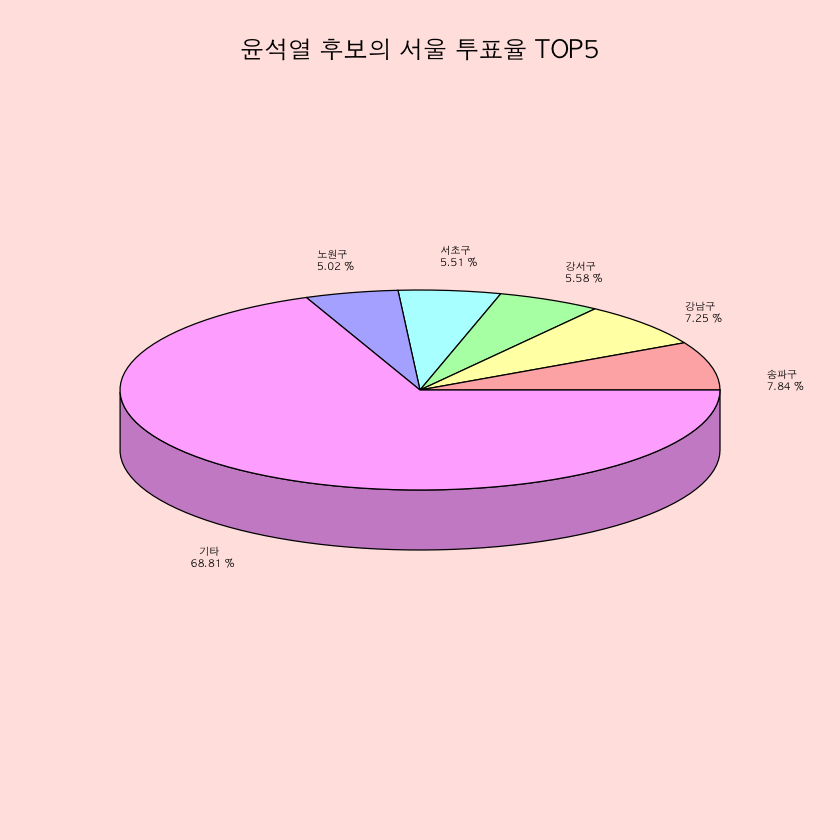

In [ ]:
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(서울윤석열$윤석열,
        main = "윤석열 후보의 서울 투표율 TOP5",
        labels = label윤,
        col = rainbow(nrow(서울윤석열), s=0.3),
        labelcex = 0.5,
)

--- 강사님풀이 ---

In [ ]:
# 서울 특별시 data만 발췌하기
#subset(election, 광역시도 == '서울특별시')
election_seoul <- election[election$광역시도=='서울특별시',]
election_seoul_윤석열 <- arrange(election_seoul, desc(윤석열))[,c(2,6)]
head(election_seoul_윤석열)

시군구,윤석열
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
강동구,160593


In [ ]:
# Ratio 구하기
election_seoul_윤석열_ratio <-
    round(c(election_seoul_윤석열[1:5,2] , sum(election_seoul_윤석열[-(1:5),2])) / sum(election_seoul_윤석열$윤석열) * 100 , 2)

election_seoul_윤석열_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [ ]:
# Lable 만들기 
election_seoul_윤석열_label <- c(as.character(election_seoul_윤석열$시군구[1:5]) , "기타")
election_seoul_윤석열_label

[1] "송파구" "강남구" "강서구" "서초구" "노원구" "기타"

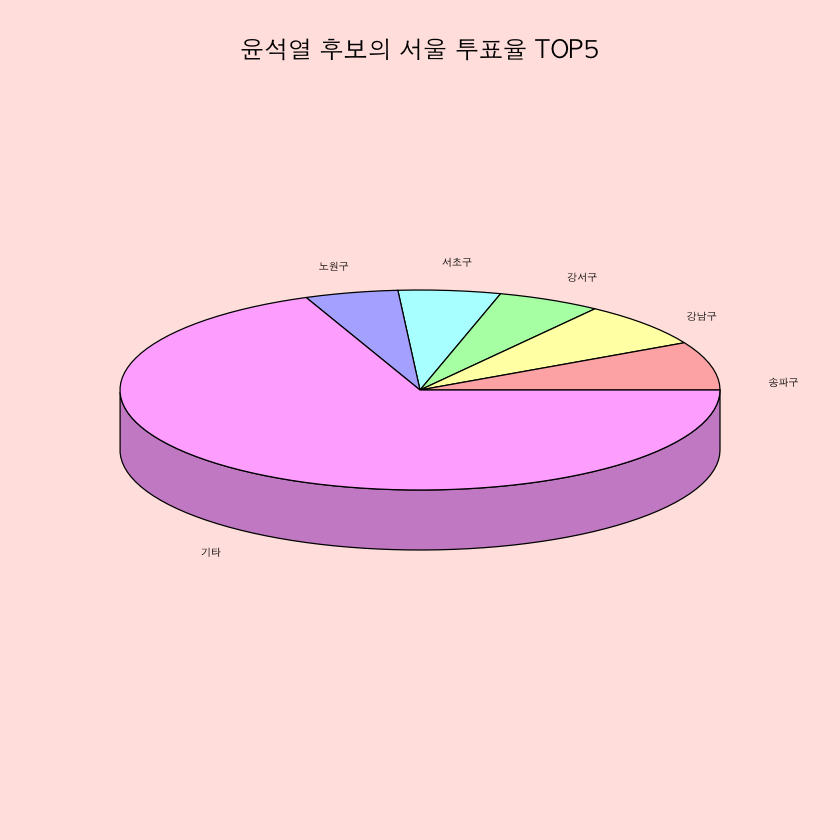

In [ ]:
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(election_seoul_윤석열_ratio,
        main = "윤석열 후보의 서울 투표율 TOP5",
        labels = election_seoul_윤석열_label,
        col = rainbow(length(election_seoul_윤석열_ratio), s=0.3),
        labelcex = 0.5,
)

# 대선 주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시의 성북구 

In [ ]:
election_성북구 <- (as.matrix(election[election$시군구 == '성북구',c(4:7)]))
election_성북구_ratio
# ratio
election_성북구_ratio <- round(c(election_성북구[,2:4], election_성북구[1] - sum(election_성북구[2:4])) / election_성북구[,1] * 100 ,2)
# label
election_성북구_label <- c(colnames(election)[5:7],'기타')

이재명 윤석열 심상정        
 48.84  46.22   3.06   1.88

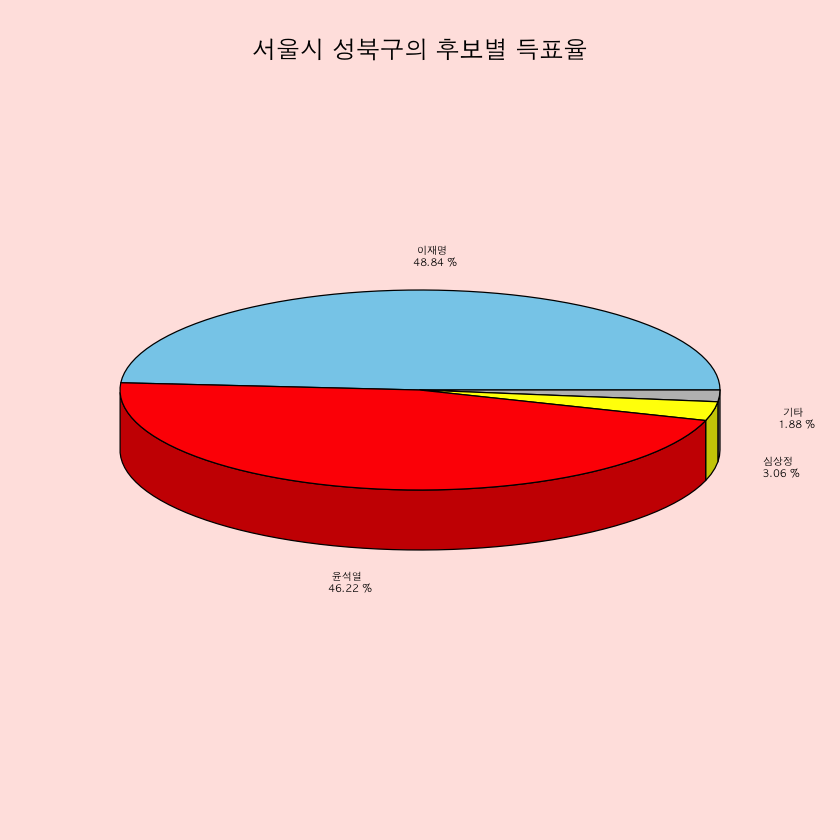

In [ ]:
par(family = 'AppleGothic', bg = 'mistyrose')
pie3D(election_성북구_ratio,
        main = "서울시 성북구의 후보별 득표율",
        labels = paste(election_성북구_label,"\n",election_성북구_ratio,"%" ),
        col = c('skyblue' , 'red', 'yellow', 'grey'),
        labelcex = 0.5,
)

In [ ]:
pob_윤석열 <- subset(election , 시군구 =="성북구")
as.numeric(c(pob_윤석열[,5:7] , pob_윤석열[,4] - sum(pob_윤석열[,5:7])))

[1] 142702 135044   8952   5489

> 5/2 수업 끗

--- 
# 투표수가 가장 많은 4지역(광역시도)의 후보별 득표수 차이를 막대그래프로 시각화
막대그래프 퀴즈 / 범례 / 데이터모양을 정리해야 한다,  막대는 데이터프레임을 모른다~

In [ ]:
#1번
big <- arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정)~광역시도, election, FUN=sum),desc(투표수))[1:4,-2]
지역명 <- big[,1]
투표수 <- t(as.matrix(big[,2:4]))
colnames(투표수) <- 지역명

#2번
경기<- t(apply(subset(election , 광역시도 =="경기도")[,5:7], 2, sum))
서울<-t(apply(subset(election , 광역시도 == "서울특별시")[,5:7], 2, sum))
부산<-t(apply(subset(election , 광역시도 =="부산광역시")[,5:7], 2, sum))
경상<-t(apply(subset(election , 광역시도 =="경상남도")[,5:7], 2, sum))
투표<- rbind(경기, 서울, 부산, 경상)
rownames(투표) <- c('경기도','서울특별시','부산광역시','경상남도')
투표수<- t(투표)


 int [1:3, 1:4] 4297931 3859666 201113 2944981 3255747 180324 831896 1270072 47541 794130 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:3] "이재명" "윤석열" "심상정"
  ..$ : chr [1:4] "경기도" "서울특별시" "부산광역시" "경상남도"


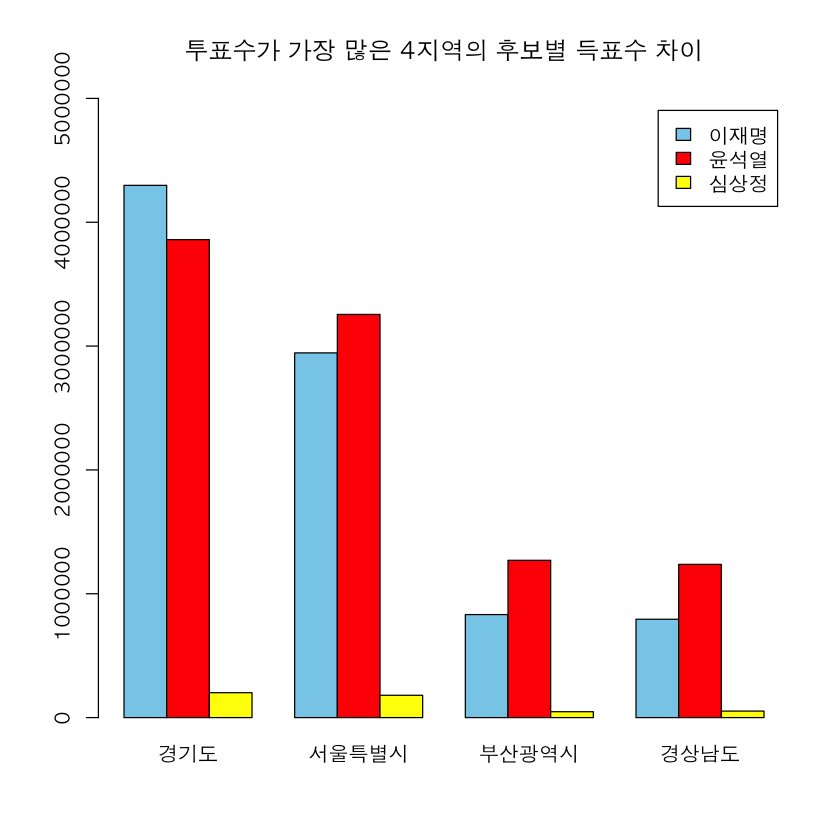

In [ ]:
par(family = 'AppleGothic' , bg='white')
barplot(투표수,
        beside =T,
        main = "투표수가 가장 많은 4지역의 후보별 득표수 차이",
        ylim = c(0 , 5000000),
        legend.text = T,
        col = c('skyblue', 'red','yellow')
     )

In [ ]:
경기<- (apply(subset(election , 광역시도 =="경기도")[,5:7], 2, sum))
서울<-(apply(subset(election , 광역시도 == "서울특별시")[,5:7], 2, sum))
부산<-(apply(subset(election , 광역시도 =="부산광역시")[,5:7], 2, sum))
경상<-(apply(subset(election , 광역시도 =="경상남도")[,5:7], 2, sum))
투표<- cbind(경기, 서울, 부산, 경상)
colnames(투표) <- c('경기도','서울특별시','부산광역시','경상남도')
투표

,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


# 투표수가 높은 시군구의 후보별 득표수를 막대그래프로 시각화

In [ ]:
지역 <- head(arrange(election, desc(투표수)),5)[,1:2] # 지역이름
지역 <- paste(지역$광역시도 , 지역$시군구)

투표수 <- t(as.matrix(head(arrange(election, desc(투표수)),5)[,5:7]))
colnames(투표수) <- 지역
투표수


,경기도 화성시,경기도 부천시,경기도 남양주시,서울특별시 송파구,서울특별시 강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


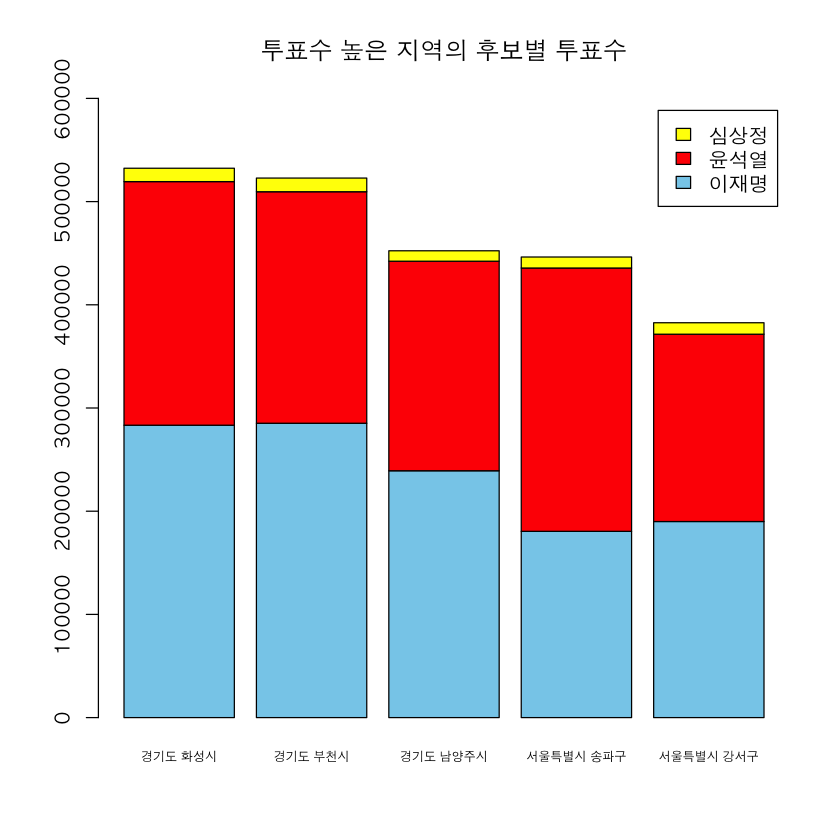

In [ ]:
par(family = 'AppleGothic' , bg='white')
barplot(투표수,
        main = "투표수 높은 지역의 후보별 투표수",
        ylim = c(0 , 600000),
        legend.text = T,
        col = c('skyblue', 'red','yellow'),
        cex.names = 0.6
     )

---
# 조별 문제 대항전

In [ ]:
library(dplyr)

In [ ]:
table(election$투표수 / election$선거인수 * 100 >= 75)
table(election$투표수 / election$선거인수 * 100 >= 75 & election$이재명 / election$투표수 * 100 > 50)
table(election$투표수 / election$선거인수 * 100 >= 75 & election$윤석열 / election$투표수 * 100 > 50)



FALSE  TRUE 
   56   192 


FALSE  TRUE 
  191    57 


FALSE  TRUE 
  142   106 

In [ ]:
election$투표율 <- election$투표수 / election$선거인수

지역75 <- subset(election, 투표율 >= 0.75)
head(지역75)

이재명 <- subset(election, 투표율 >= 0.75 & 이재명/투표수 > 0.5)
#table(subset(election, 투표율 >= 0.75 & 이재명/투표수 > 0.5)$광역시도)
head(이재명)

윤석열 <- subset(election, 투표율 >= 0.75 & 윤석열/투표수 > 0.5)
head(윤석열)


광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183,0.7742598
서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055,0.7626696
서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076,0.7638652
서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292,0.7824283
서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531,0.7756422
서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565,0.7713008


광역시도,n
강원도,14
경기도,26
경상남도,18
경상북도,22
광주광역시,5
대구광역시,8
대전광역시,4
부산광역시,8
서울특별시,24
세종특별자치시,1


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
12,서울특별시,은평구,417391,317971,161510,140666,9715,311891,98.08788,0.7618061
18,서울특별시,금천구,208786,157035,80208,69227,4278,153713,97.88455,0.7521338
60,광주광역시,동구,90678,73877,60669,11036,1063,72768,98.49886,0.8147180
61,광주광역시,서구,248147,202633,170357,26262,2961,199580,98.49334,0.8165845
62,광주광역시,남구,180643,148854,124572,19927,2073,146572,98.46695,0.8240231
63,광주광역시,북구,363088,295658,249976,36421,4550,290947,98.40660,0.8142874


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	6 obs. of  2 variables:
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 2 5 9 10 13 14
 $ n       : int  12 5 2 1 22 15


광역시도,n
경기도,12
광주광역시,5
서울특별시,2
세종특별자치시,1
전라남도,22
전라북도,15


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,투표율
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055,0.7626696
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076,0.7638652
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292,0.7824283
19,서울특별시,영등포구,334361,263581,116443,134846,7627,258916,98.23015,0.7883126
22,서울특별시,서초구,344756,277878,88686,179472,5864,274022,98.61234,0.8060135
23,서울특별시,강남구,451970,354778,106865,235897,7020,349782,98.59180,0.7849592


광역시도,n
강원도,14
경기도,6
경상남도,18
경상북도,22
대구광역시,8
대전광역시,1
부산광역시,8
서울특별시,8
울산광역시,3
인천광역시,3


In [ ]:
지역 <- count(지역75, 광역시도)
지역
a<-as.matrix(지역[,2])
rownames(a) <- 지역$광역시도

a

이2 <- data.frame(table(이재명$광역시도))
윤2 <- data.frame(table(윤석열$광역시도))
이 <- count(이재명, 광역시도)
윤 <- count(윤석열, 광역시도)


광역시도,n
강원도,14
경기도,26
경상남도,18
경상북도,22
광주광역시,5
대구광역시,8
대전광역시,4
부산광역시,8
서울특별시,24
세종특별자치시,1


,n
강원도,14
경기도,26
경상남도,18
경상북도,22
광주광역시,5
대구광역시,8
대전광역시,4
부산광역시,8
서울특별시,24
세종특별자치시,1


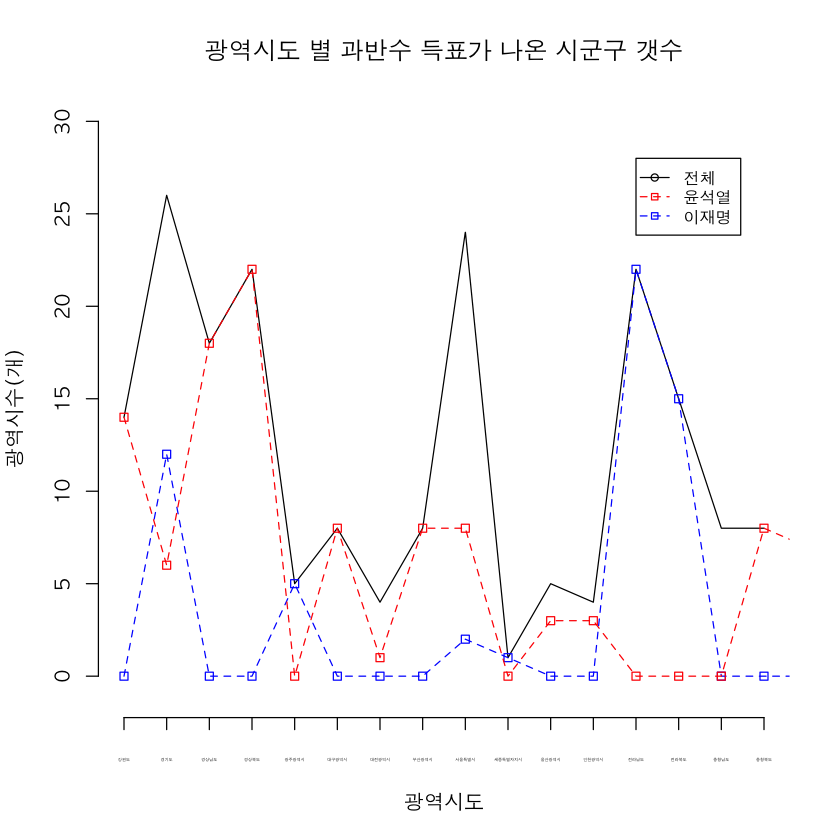

In [ ]:
par(family = "AppleGothic", bg='white')
plot(지역$n,
    cex= 0.3,
    type = 'l',
    pch = 21,
    axes = F, # x, y 좌표 Frame 제거
    ann = F,
   ylim = c(-1,30)
    #col = ifelse( seoul$발생건수 >= 150, 'blue','yellow')
)
axis(1, at=1:nrow(a), lab = rownames(a) , cex.axis=0.2) #(방향, 범위, 라벨명)
axis(2, ylim = c(-1,30))
# main title 지정
title(main = "광역시도 별 과반수 득표가 나온 시군구 갯수" )

# x 축 title(label) 지정
title(xlab = "광역시도" )

# y 축 title(label) 지정
title(y = "광역시수(개)" )

lines(이2,
    type="o", #overlap
    pch = 22, # 사각형
    col = "blue",
    lty = 2,
    space = 1,
)
lines(윤2,
    type="o", #overlap
    pch = 22, # 사각형
    col = "red",
    lty = 2
)
# 범례
legend(13, 28, # x, y 좌표값
    c('전체', '윤석열', '이재명'),
    col= c('black', 'red', 'blue'),
    pch = c(21,22,22),
    lty = c(1,2,2),
    cex = 0.8, # 크기조절 R에서 기본값 1
    
)

In [ ]:
library(dplyr)
ratio <-data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))
head(ratio)

data.frame(table(이재명$광역시도))
#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)
count(지역75,광역시도)

#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)
count(이재명50,광역시도)

#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)
count(윤석열50,광역시도)

merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
merge2[is.na(merge2)] <-0
merge2
team<- t(as.matrix(merge2[,2:4]))
team

광역시도,시군구,투표율,이재명,윤석열,심상정
경기도,과천시,84.88902,38.88253,57.08012,2.424623
전라남도,구례군,84.02284,84.34560,12.29354,1.212628
전라북도,장수군,83.78504,83.57363,12.71103,1.367837
경상북도,군위군,83.72659,13.76720,82.41680,1.184275
전라북도,진안군,83.54750,82.93291,13.64094,1.400159
전라북도,순창군,83.36059,85.41677,11.12229,1.157000


Var1,Freq
강원도,0
경기도,12
경상남도,0
경상북도,0
광주광역시,5
대구광역시,0
대전광역시,0
부산광역시,0
서울특별시,2
세종특별자치시,1


광역시도,n
강원도,14
경기도,26
경상남도,18
경상북도,22
광주광역시,5
대구광역시,8
대전광역시,4
부산광역시,8
서울특별시,24
세종특별자치시,1


광역시도,n
경기도,12
광주광역시,5
서울특별시,2
세종특별자치시,1
전라남도,22
전라북도,15


광역시도,n
강원도,14
경기도,6
경상남도,18
경상북도,22
대구광역시,8
대전광역시,1
부산광역시,8
서울특별시,8
울산광역시,3
인천광역시,3


광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


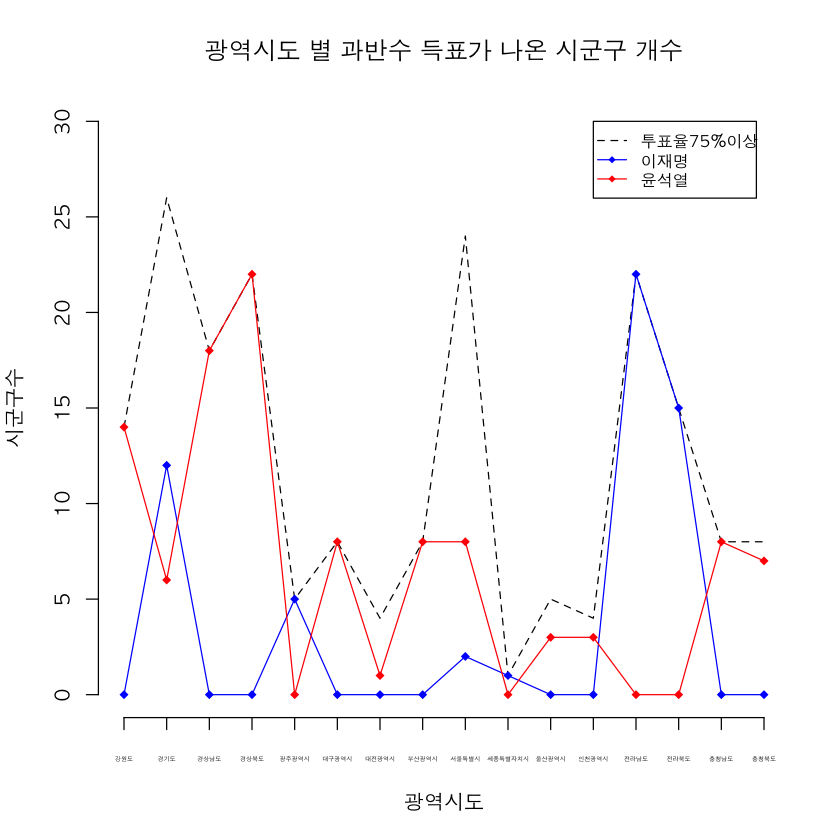

In [ ]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,
    
    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도, cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")

lines(team[2,],
      type='o',
      pch=18,
      lty=1,
      col="blue")

lines(team[3,],
      type='o',
      pch=18,
      lty=1,
      col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )

In [ ]:
# 1번째 조 문제
# 광역시도 별로 최고최저 지역 득표율 
# 투표율 최고, 최저 지역의 득표율
광역시 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)

# 투표율 최고, 최저 지역의 득표율

문제 <- 광역시
문제$투표율 <- 문제$투표수 / 문제$선거인수
문제 <- arrange(문제, desc(투표율))
최고 <- 문제[1,]
최저 <- 문제[length(문제$광역시도),]

득 <- rbind(최고, 최저)[,3:6]
득$기타 = (득$투표수 - 득$이재명 - 득$윤석열 - 득$심상정) / 득$투표수*100
득$이재명 = 득$이재명/득$투표수*100
득$윤석열 = 득$윤석열/득$투표수*100
득$심상정 = 득$심상정/득$투표수*100
득 <- arrange(득, )
득 <- t(as.matrix(득[,2:5]))
colnames(득) <- c("최고 :광주광역시","최저 :제주특별자치도")
득



,최고 :광주광역시,최저 :제주특별자치도
이재명,84.227777,52.027467
윤석열,12.634400,42.234694
심상정,1.508384,3.319427
기타,1.629440,2.418412


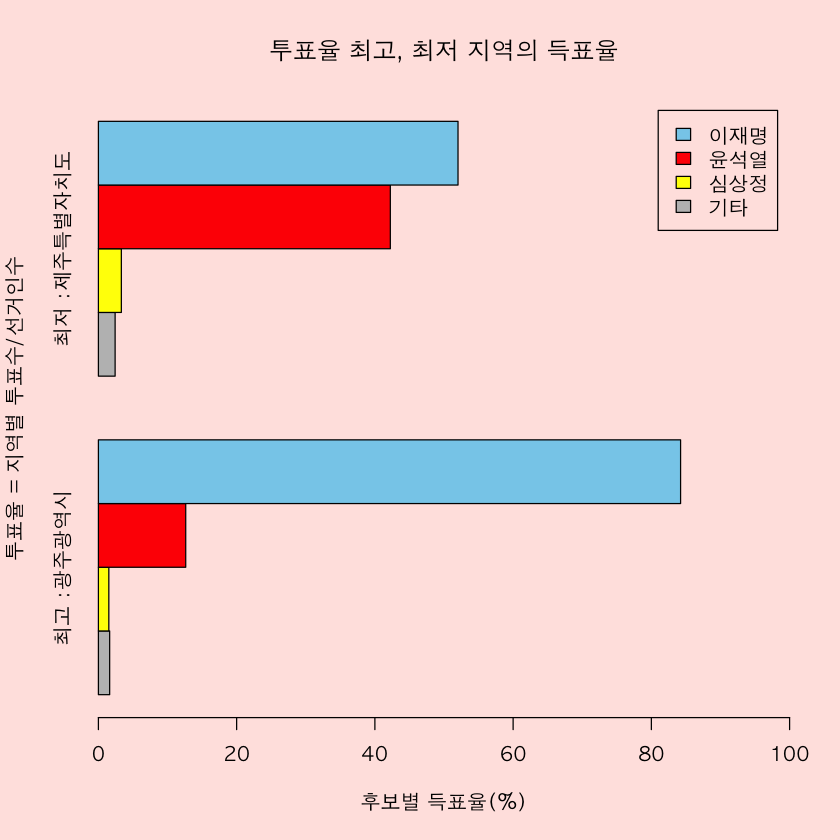

In [ ]:
# 가로로 돌리기
par(family = 'AppleGothic', bg = 'mistyrose')
barplot(
    득[c(4,3,2,1),],
    horiz = T,
    beside = T,
    main = "투표율 최고, 최저 지역의 득표율",
    ylab = "투표율 = 지역별 투표수/선거인수",
    xlab = "후보별 득표율(%)",
    col=c('grey','yellow', 'red','sky blue'),
    legend.text = T,
    xlim=c(0,100),

)  

In [ ]:

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 >= 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 >= 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트 <- t(차트)
차트


,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
이재명,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0,0
윤석열,14,6,18,22,0,8,1,8,8,0,3,3,0,0,0,8,7
투표율,14,26,18,22,5,8,4,8,24,1,5,4,22,15,0,8,8
합계,28,44,36,44,10,16,5,16,34,2,8,7,44,30,0,16,15


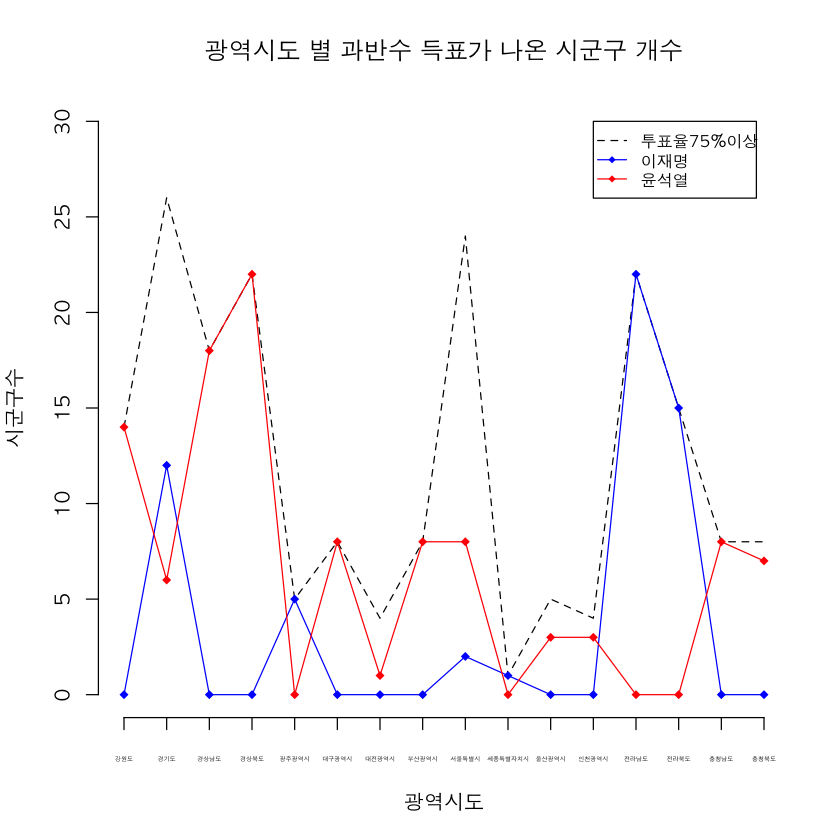

In [ ]:
par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,
    
    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도, cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")

lines(team[2,],
      type='o',
      pch=18,
      lty=1,
      col="blue")

lines(team[3,],
      type='o',
      pch=18,
      lty=1,
      col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )

In [582]:

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 > 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 > 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트 <- subset(차트 , 이재명!= 0 | 윤석열 != 0 | 투표율 != 0 | 합계 != 0) # 모든 조건에 해당하지 않는 값 제거



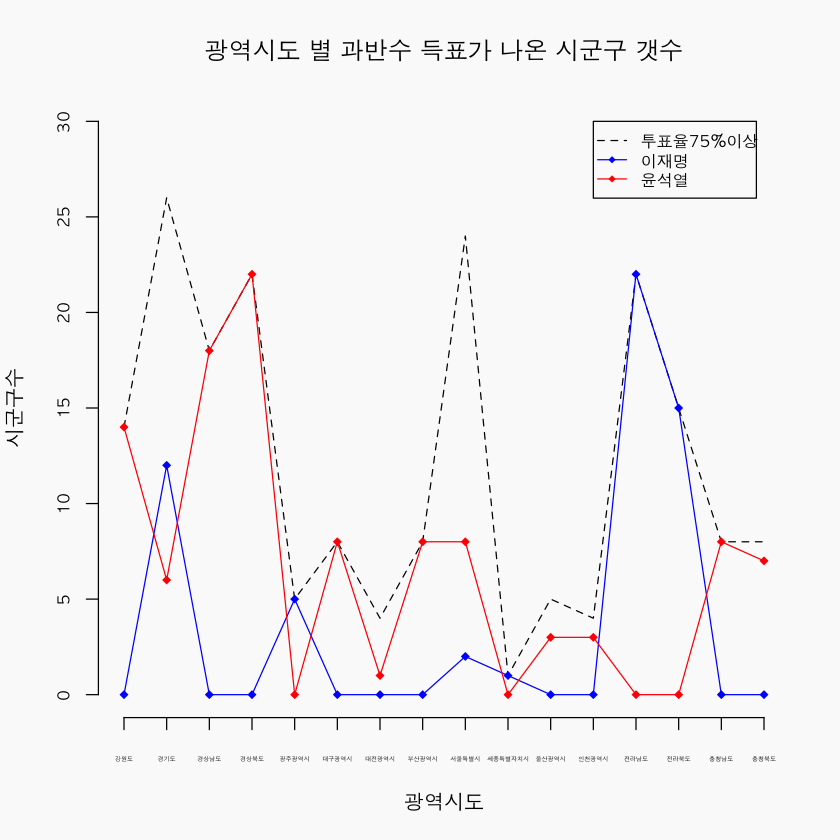

In [581]:
par(family = 'AppleGothic', bg = '#fafafa')
plot(
    c(차트[,3]),
    type='l',
    ylim= c(0,30),
    lty = 2,
    axes = F, #x,y 좌표 frame 제거
    ann = F, #x,y label 제거
    col.main = 'black'
   
)
axis(1,at=1:16, lab=colnames(t(차트)), cex.axis=0.3)
axis(2, cex.axis=0.8)
# main title 지정
title(main = "광역시도 별 과반수 득표가 나온 시군구 갯수" )
# x 축 title(label) 지정
title(xlab = "광역시도" )
# y 축 title(label) 지정
title(y = "시군구수")

lines(
    c(차트[,1]),
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    c(차트[,2]),
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )

In [ ]:
# 3번
광역시 <- 
광<- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~광역시도,election,sum)
광$권역 <- c('강원권', '수도권', '영남권', '영남권', '호남권', '영남권', '충청권', '영남권', '수도권', '충청권', '영남권', '수도권', '호남권', '호남권','호남권','충청권','충청권')
권역 <-aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정)~권역,광,sum)
권역$이재명<- 권역$이재명 / 권역$투표수 * 100
권역$윤석열<- 권역$윤석열 / 권역$투표수 * 100
권역$심상정<- 권역$심상정 / 권역$투표수 * 100
권역<-권역[,c(-2,-3)]
권역

권역,이재명,윤석열,심상정
강원권,41.32559,53.66839,2.464996
수도권,48.24977,47.28989,2.563205
영남권,31.72486,63.56068,2.192608
충청권,45.42098,49.62439,2.576720
호남권,80.63658,15.84357,1.640707


In [558]:
# 4번
# 실제 득표율 이재명 47.83, 윤석열 48.56 , 심상정 2.37
# 각 시군구별 실제 득표율과 가장 유사한 지역 top 5를 뽑아서 오차의 합을 막대그래프로 그려라
# 후보 오차 1프로 이내, 오차의 합이 최소인 지역 순서대로 정렬
문제 <- election[,-c(8,9)]

문제$이 <- (election$이재명 / election$투표수) * 100
문제$윤 <- (election$윤석열 / election$투표수) * 100
문제$심 <- (election$심상정 / election$투표수) * 100

문제$이재명 <- abs(문제$이 - 47.83)
문제$윤석열 <- abs(문제$윤 - 48.56)
문제$심상정 <- abs(문제$심 - 2.37)

문제 <- subset(문제, 이재명<=1 & 윤석열<=1 & 심상정<=1 & 이 < 윤)
문제$오차합 <- 문제$이재명 + 문제$윤석열 + 문제$심상정
문제 <- arrange(문제, 오차합)
문제



광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,이,윤,심,오차합
대전광역시,유성구,288686,231027,0.7787895,0.3656331,0.4400612,47.05121,48.19437,2.810061,1.584484
인천광역시,미추홀구,356862,253347,0.7455664,0.7512634,0.3736678,47.08443,47.80874,2.743668,1.870498
인천광역시,동구,53909,40918,0.9191050,0.5102419,0.5529190,46.91089,48.04976,2.922919,1.982266
대전광역시,대덕구,152905,115404,0.9347451,0.7635631,0.3517427,46.89525,47.79644,2.721743,2.050051
충청북도,청주시흥덕구,223335,163683,0.8245077,0.9362394,0.5441695,47.00549,47.62376,2.914169,2.304917


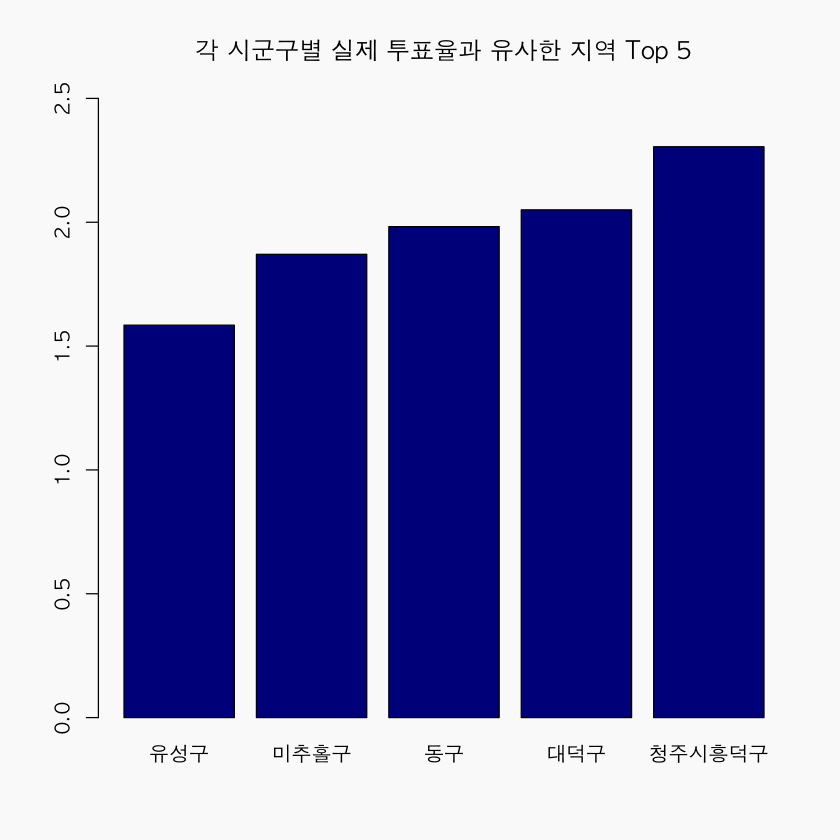

In [559]:
par(family = 'AppleGothic', bg = '#fafafa')
name <- 문제[1:5,2]
barplot(
    문제[1:5, 11],
    ylim = c(0,2.5),
    names = name,
    main = '각 시군구별 실제 투표율과 유사한 지역 Top 5',
    col = 'darkblue'
)

> 5/3 끗